In [251]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

# Data Exploraration 5 insights

In [253]:
titanic = sns.load_dataset("titanic")

In [254]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [255]:
titanic.shape

(891, 15)

In [256]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##Analysis of Missing Values

In [257]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [258]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [259]:
print('Percentage of missing or null values for Age:', 177/981)
print('Percentage of missing or null values for Embarked:', 2/981)
print('Percentage of missing or null values for Deck:', 688/981)
print('Percentage of missing or null values for Embarked Town:', 2/981)


Percentage of missing or null values for Age: 0.18042813455657492
Percentage of missing or null values for Embarked: 0.0020387359836901123
Percentage of missing or null values for Deck: 0.7013251783893986
Percentage of missing or null values for Embarked Town: 0.0020387359836901123


Age: 18%
It has more than 10% missing data, which can introduce bias in the information. We can choose to remove the variable. However, from my understanding of the problem, this feature shows factors that can predict survival. Age can be an important factor because age is also related to physical strength and mental maturity, which play an important role in moments of life or death.

Embarked:
We will complete the data with the mode since it is a categorical variable.

Deck:
We will eliminate the variable since it has more than 70% missing data.

Alive:
This feature is redundant and expresses the same information as survived, so we will also remove it from the dataframe.

Embarked Town:
We will remove it for being redundant with embarked.

Class:
We will remove it for being redundant with Pclass.

In [260]:
titanic = titanic.drop(labels =['deck','alive','embark_town','class'],axis=1)

In [261]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
5,0,3,male,NaN,0,0,8.4583,Q,man,True,True
6,0,1,male,54.0,0,0,51.8625,S,man,True,True
7,0,3,male,2.0,3,1,21.0750,S,child,False,False
8,1,3,female,27.0,0,2,11.1333,S,woman,False,False
9,1,2,female,14.0,1,0,30.0708,C,child,False,False


Target Variable: Survived
The target variable for this analysis is 'Survived', which indicates whether a passenger survived the Titanic disaster. It is a binary variable where:

0 indicates the passenger did not survive.
1 indicates the passenger survived.
This variable will be used as the dependent variable in our predictive modeling.

In [262]:
titanic.groupby('survived').size()
titanic.survived.value_counts(normalize=True)

survived
0    549
1    342
dtype: int64

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

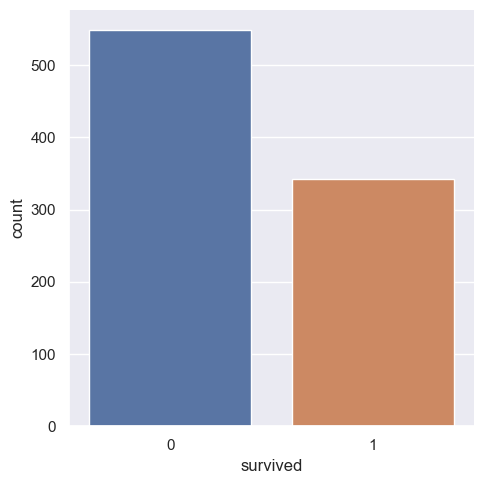

In [263]:
sns.catplot(x='survived', data=titanic, kind="count")
plt.show()

Approximately 38% of the registered passengers in the data survived the sinking of the Titanic.

In [264]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


Analysis of Numerical Variables
The dataset shows 10 features, of which 6 are categorized as integers or floats. However, looking in detail:
Survived and Pclass are excluded since the numbers come from a classification.
Therefore, we will analyze the numerical data of Age, SibSp, Parch, and Fare. The remaining data will be treated as categorical data.

In [265]:
#Seleccion de Y
y = titanic[['survived']]
y.head(10)

,survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [266]:
#Seleccion de X
x = titanic.drop(labels =['survived'],axis =1)
x.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,female,35.0,1,0,53.1000,S,woman,False,False
4,3,male,35.0,0,0,8.0500,S,man,True,True
5,3,male,NaN,0,0,8.4583,Q,man,True,True
6,1,male,54.0,0,0,51.8625,S,man,True,True
7,3,male,2.0,3,1,21.0750,S,child,False,False
8,3,female,27.0,0,2,11.1333,S,woman,False,False
9,2,female,14.0,1,0,30.0708,C,child,False,False


##### X_Numerics

In [267]:
X_Numericas = titanic.select_dtypes(include='number')
X_Numericas.head(5)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [268]:
X_Numericas.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>, <Axes: >]], dtype=object)

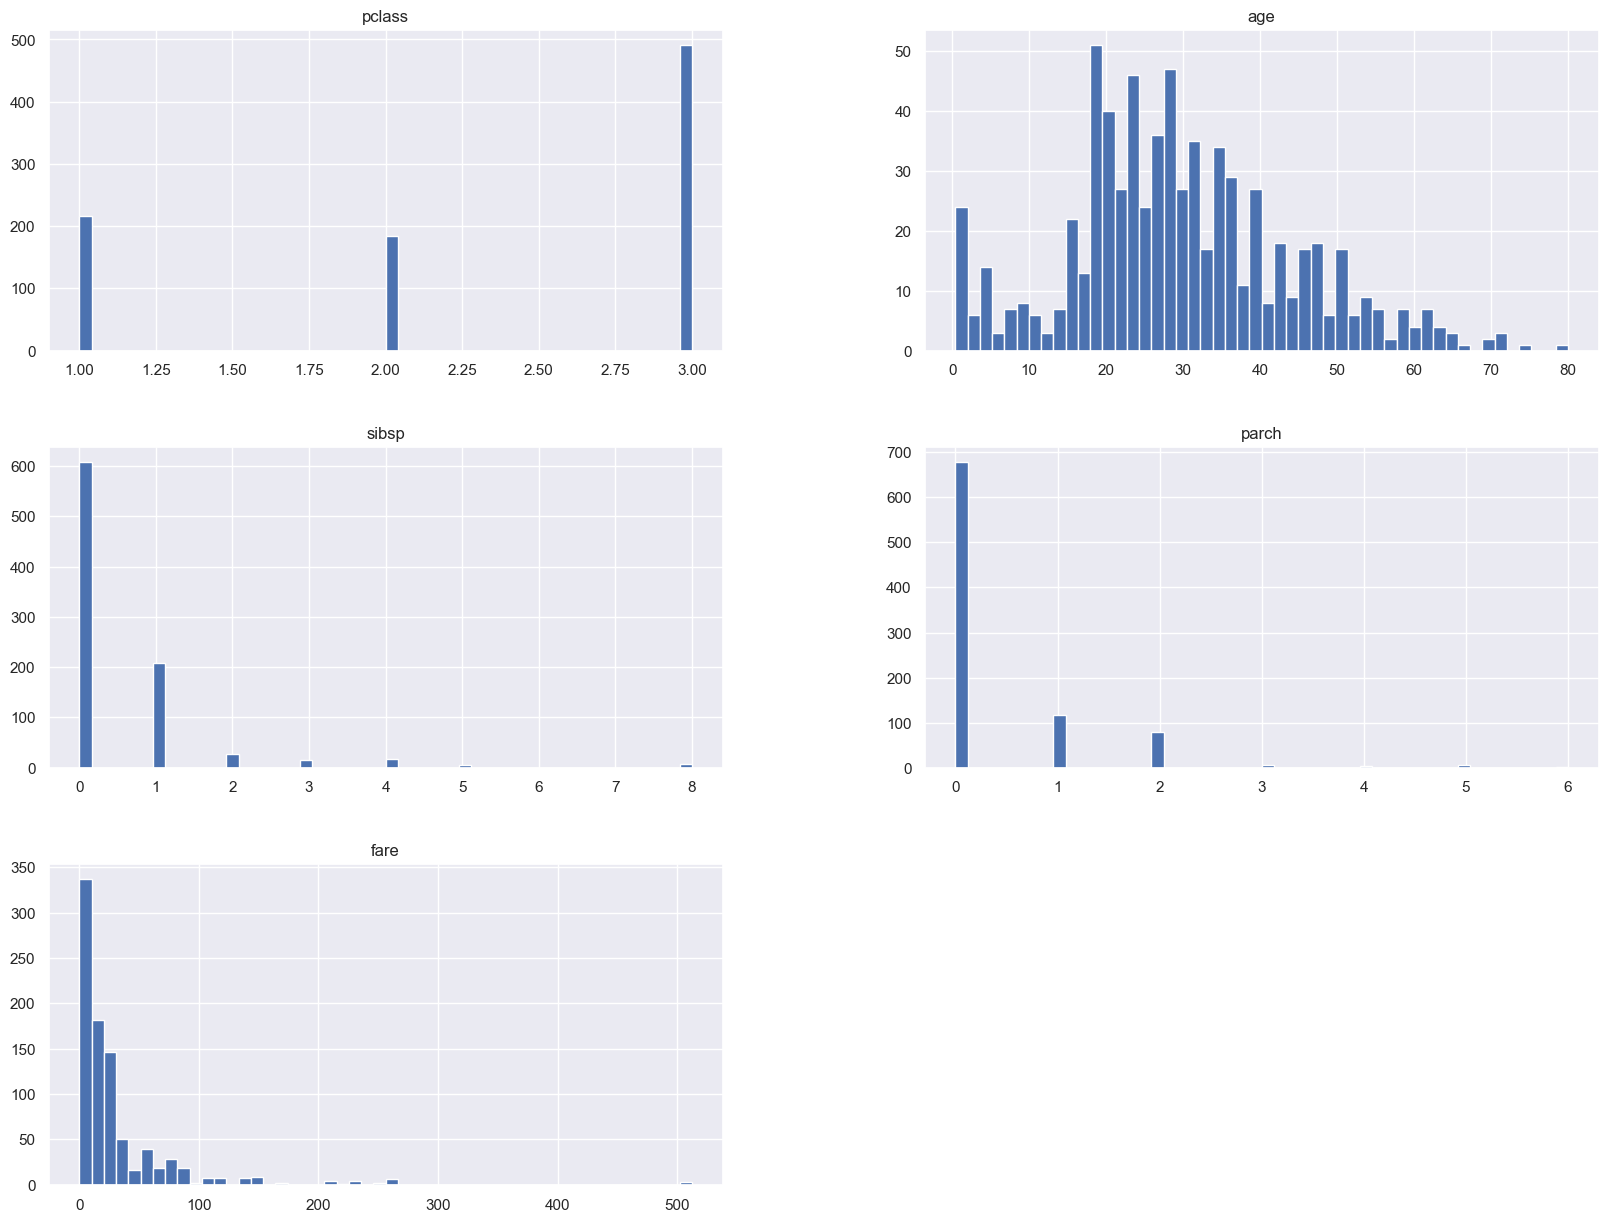

In [269]:
Var=['pclass','age','sibsp','parch','fare']
X_Numericas[Var].hist(bins=50 ,figsize=(20,15))
plt.show()

Trends are evident in the different categories. The variables Pclass, SibSp, and Parch are discrete variables, so they group the number of unique findings.
Now, we will cross the numerical variables with each other and additionally add the target variable to understand the distribution and start generating hypotheses about which variables better discriminate between the two groups (survived).

c:\Users\walte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\walte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\walte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\walte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

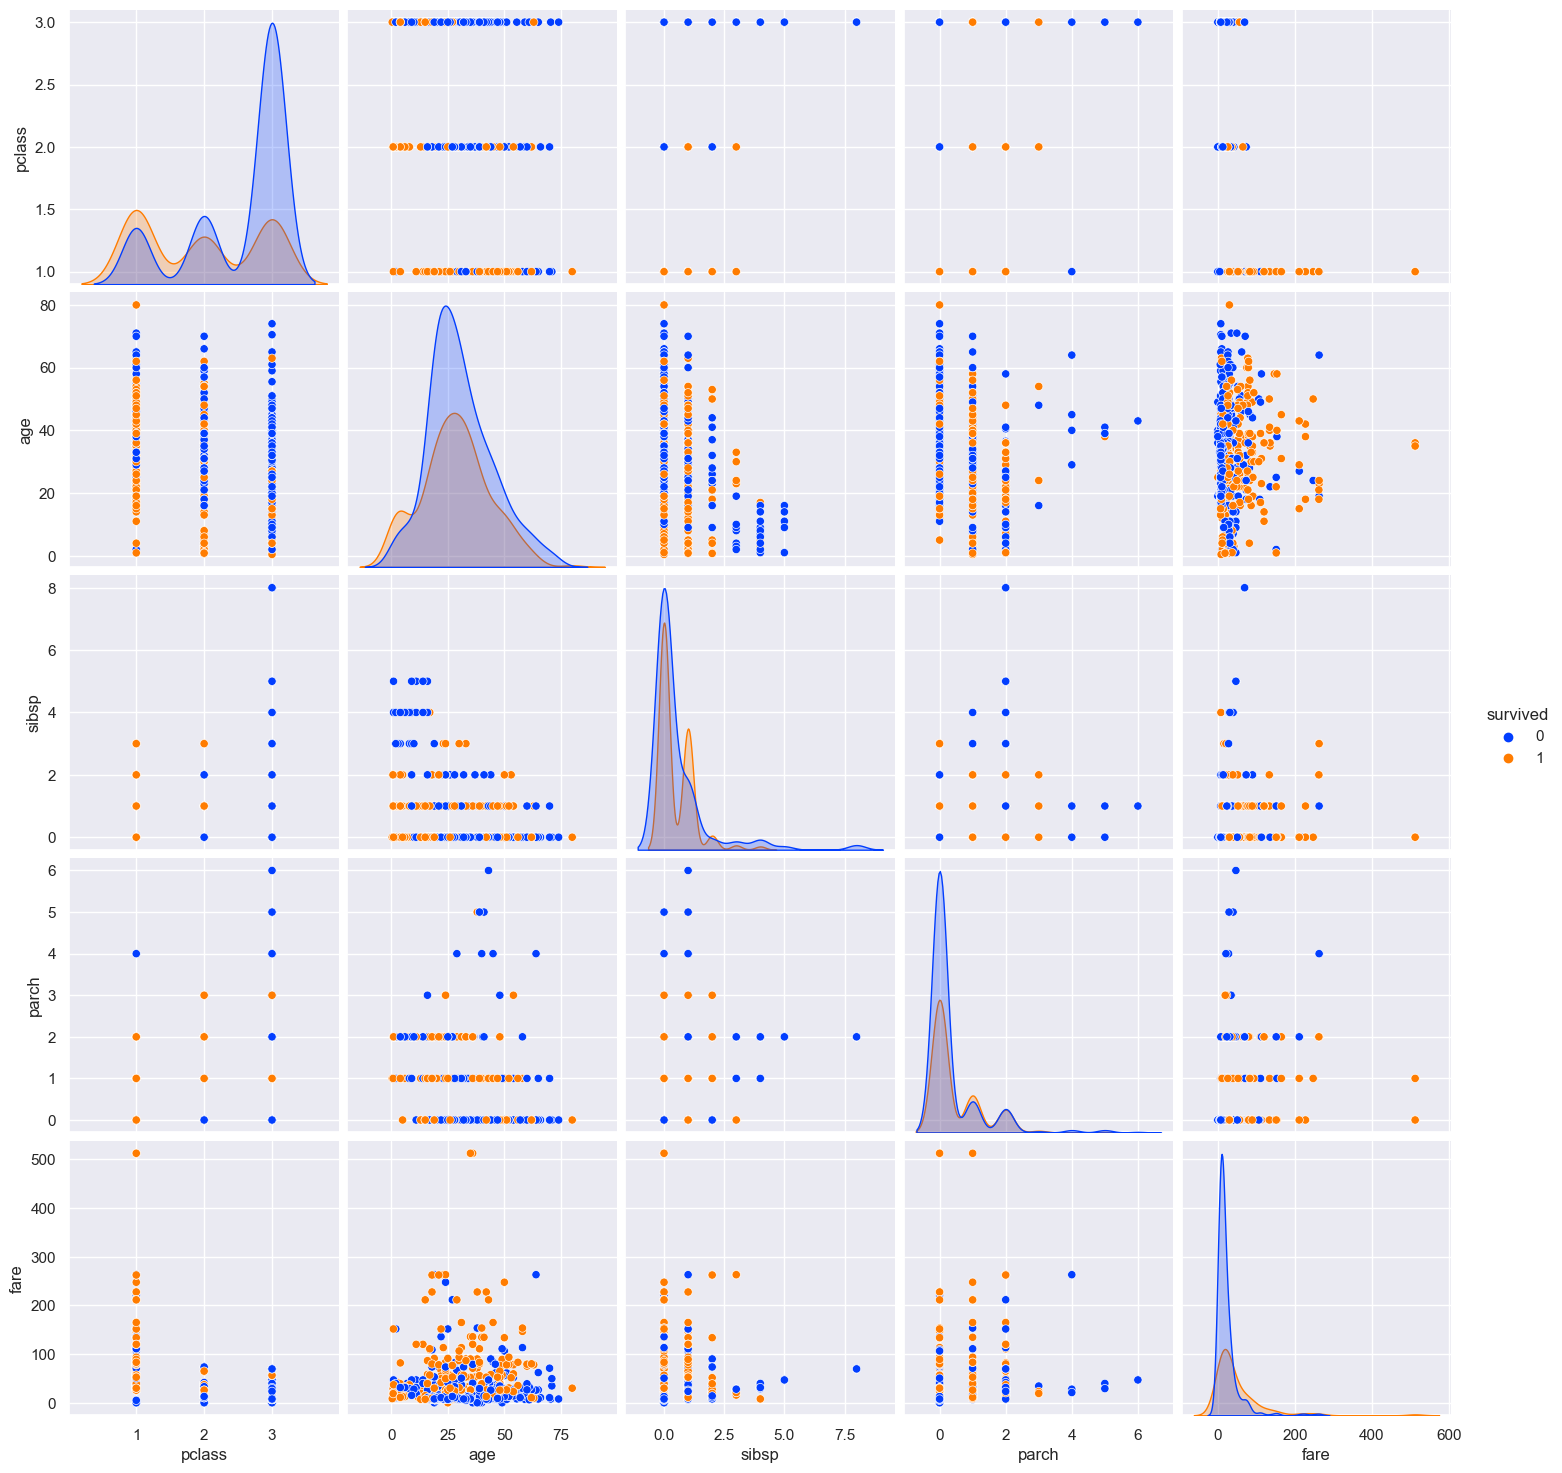

In [270]:
sns.pairplot(X_Numericas, height=3, diag_kind = 'kde', hue='survived',palette ="bright" )

From the graphs, we can interpret the following:
All four factors are critical. It can be observed that:
There is a higher number of deaths in the lower class compared to the upper class.
Regarding age, the highest number of casualties is in the 20 to 50 years range.
Similarly, those with a larger number of children or family members have the highest number of deaths.
With respect to fare, it is related to class, where those who paid less have the highest number of deaths.

<Axes: >

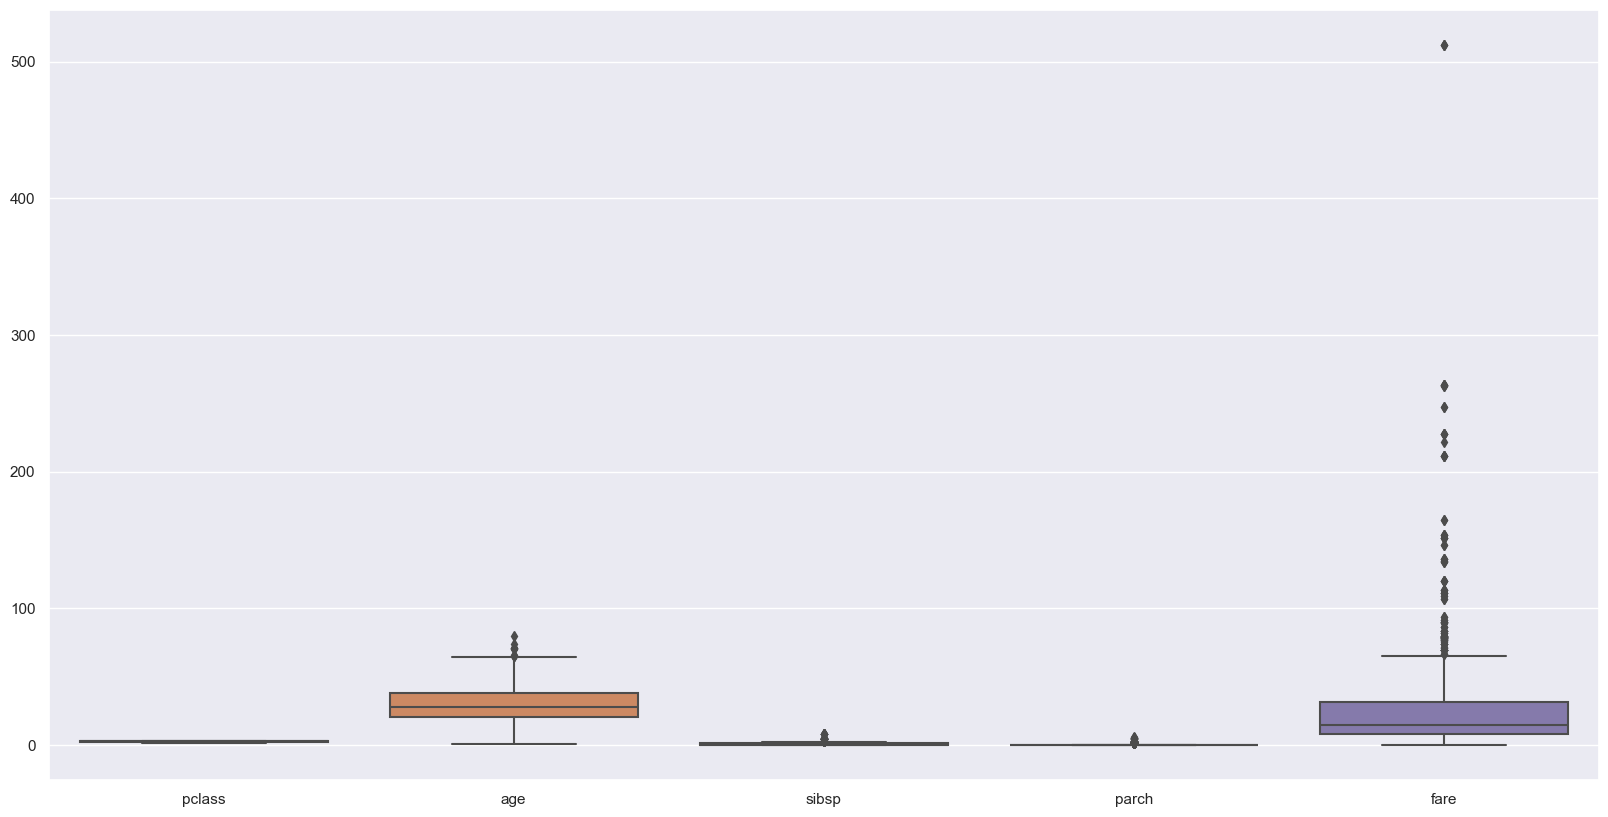

In [271]:
plt.rcParams['figure.figsize'] = [20,10]
sns.boxplot(data = X_Numericas[Var])

Remove outliers, and then complete the information with random values.

In [272]:

# Eliminamos estadisticamente los outliers - Fare
Q1 = titanic.fare.quantile(0.05)
Q3 = titanic.fare.quantile(0.95)
IQR = Q3 - Q1
titanic = titanic[(titanic.fare >= Q1 - 1.5*IQR) & (titanic.fare <= Q3 + 1.5*IQR)]

In [273]:
titanic.shape


(888, 11)

<Axes: >

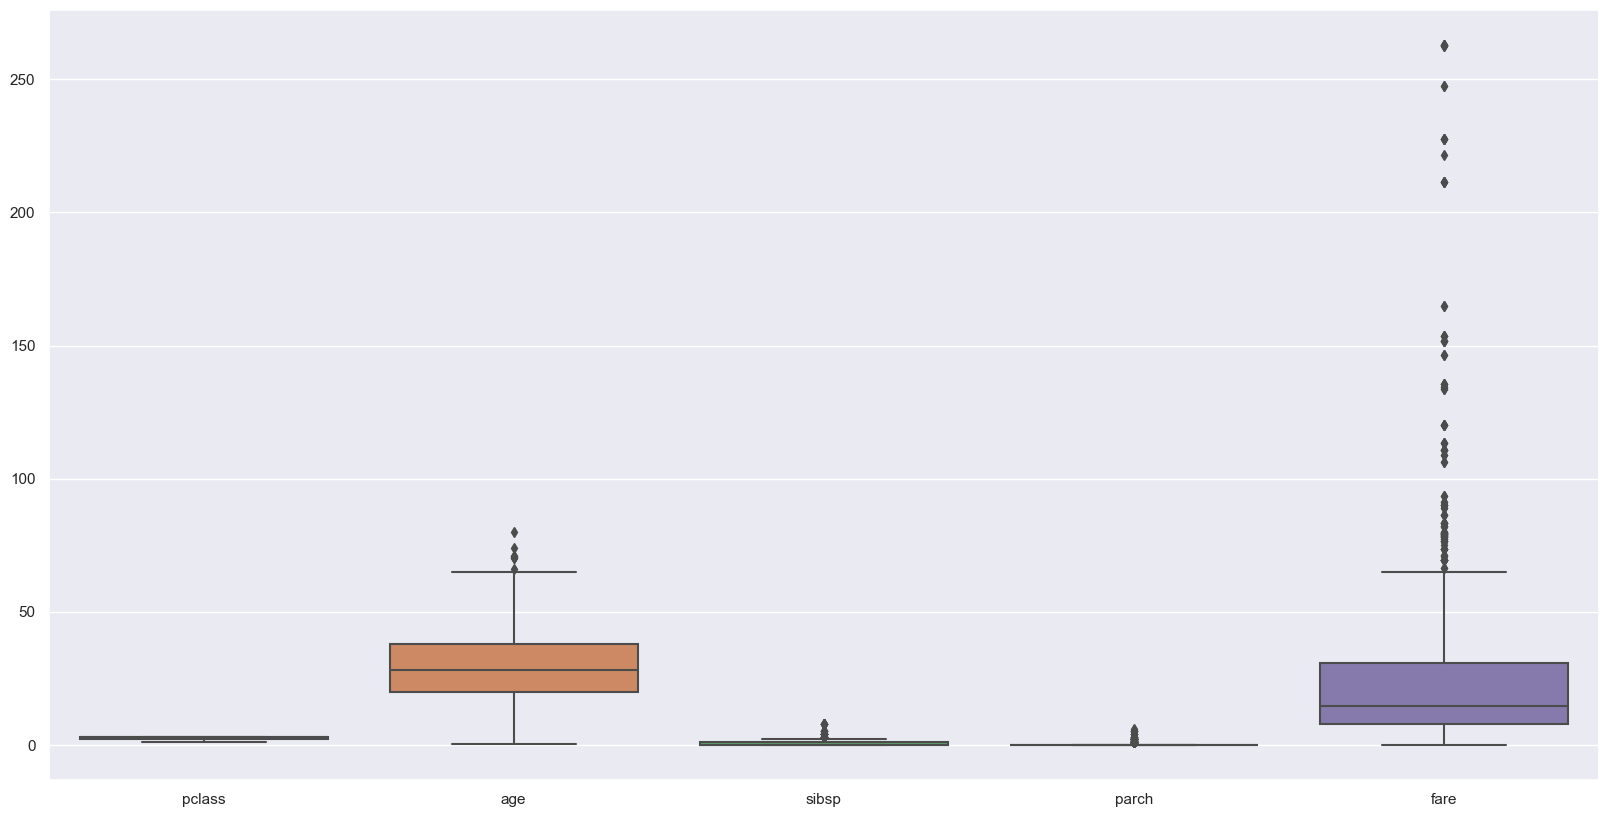

In [274]:
plt.rcParams['figure.figsize'] = [20,10]
sns.boxplot(data = titanic[Var])

In [275]:
X_Numericas.shape

(891, 6)

Fill in the missing Age data

In [276]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,29.675345,0.524775,0.381757,30.582164
std,0.486091,0.834007,14.552495,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


In [277]:
# Calculate the mean and standard deviation of the 'Age' column
age_avg = titanic['age'].mean()
age_std = titanic['age'].std()
age_null_count = titanic['age'].isnull().sum()

# Generate random ages based on the mean and std deviation, and fill the null values
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

# Identify rows with missing 'Age' values
conValoresNulos = np.isnan(titanic['age'])

# Fill the missing 'Age' values with the generated random ages
titanic.loc[conValoresNulos, 'age'] = age_null_random_list

# Convert the 'Age' column to integer type
titanic['age'] = titanic['age'].astype(int)

# Print the statistics
print("Average Age: " + str(age_avg))
print("Std Deviation Age: " + str(age_std))
print("Interval for assigning random age: " + str(int(age_avg - age_std)) + " to " + str(int(age_avg + age_std)))


Average Age: 29.67534458509142
Std Deviation Age: 14.552495274664139
Interval for assigning random age: 15 to 44


C:\Users\walte\AppData\Local\Temp\ipykernel_21856\3286742895.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'] = titanic['age'].astype(int)


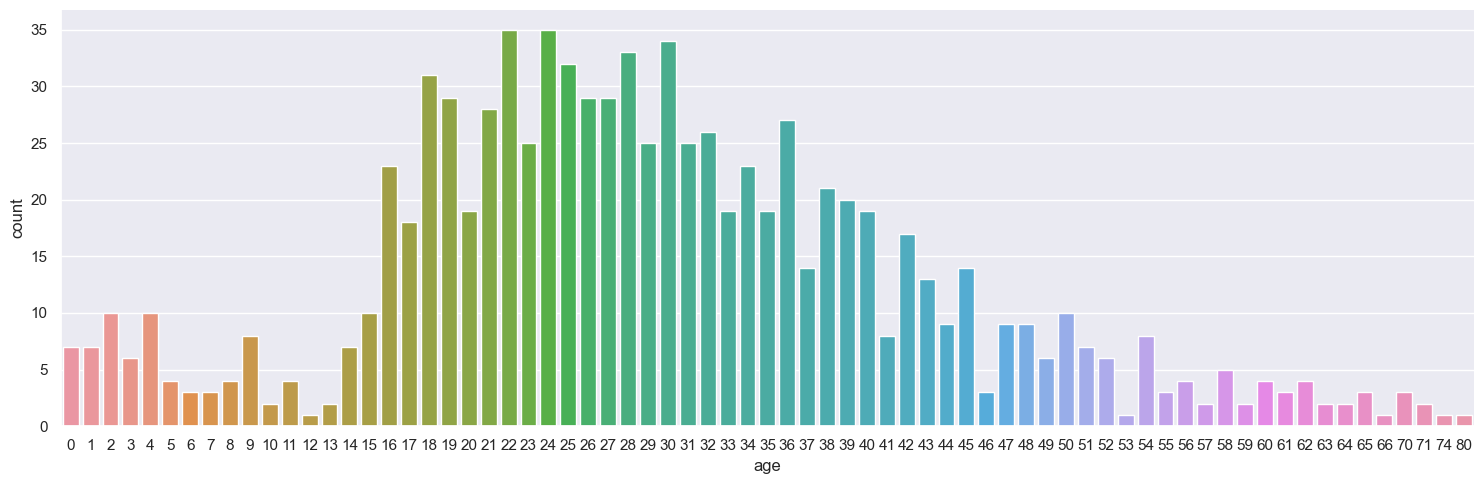

In [278]:
sns.catplot(x='age', data=titanic, kind="count", aspect=3)
plt.show()

In [279]:
titanic.shape
titanic.info()

(888, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    888 non-null    int64  
 1   pclass      888 non-null    int64  
 2   sex         888 non-null    object 
 3   age         888 non-null    int32  
 4   sibsp       888 non-null    int64  
 5   parch       888 non-null    int64  
 6   fare        888 non-null    float64
 7   embarked    886 non-null    object 
 8   who         888 non-null    object 
 9   adult_male  888 non-null    bool   
 10  alone       888 non-null    bool   
dtypes: bool(2), float64(1), int32(1), int64(4), object(3)
memory usage: 67.6+ KB


### Correlation

<Figure size 800x600 with 0 Axes>

<Axes: >

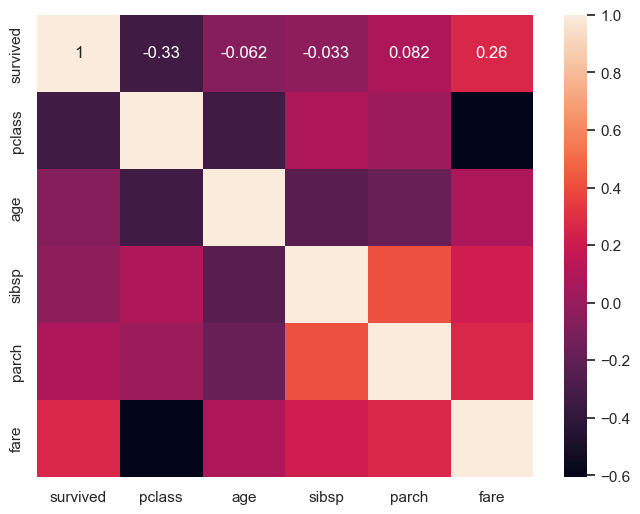

In [280]:
corr = titanic[['survived','pclass','age','sibsp','parch','fare']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

Qualitative Variables

We will obtain the qualitative variables to understand their distribution and their relationship with the target variable.

In [281]:
categorias = titanic.select_dtypes(exclude=['number'])
categorias.dtypes

sex           object
embarked      object
who           object
adult_male      bool
alone           bool
dtype: object

We will replace the missing values of Embarked, just to have a complete dataset.
python

In [282]:
titanic.embarked.value_counts()

embarked
S    644
C    165
Q     77
Name: count, dtype: int64

In [283]:
titanic['embarked'].fillna(value='S',inplace=True)

C:\Users\walte\AppData\Local\Temp\ipykernel_21856\817680446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embarked'].fillna(value='S',inplace=True)


In [284]:
titanic.embarked.value_counts()

embarked
S    646
C    165
Q     77
Name: count, dtype: int64

SEX

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='sex', ylabel='count'>

<bound method Series.sort_index of sex
male      0.647523
female    0.352477
Name: proportion, dtype: float64>

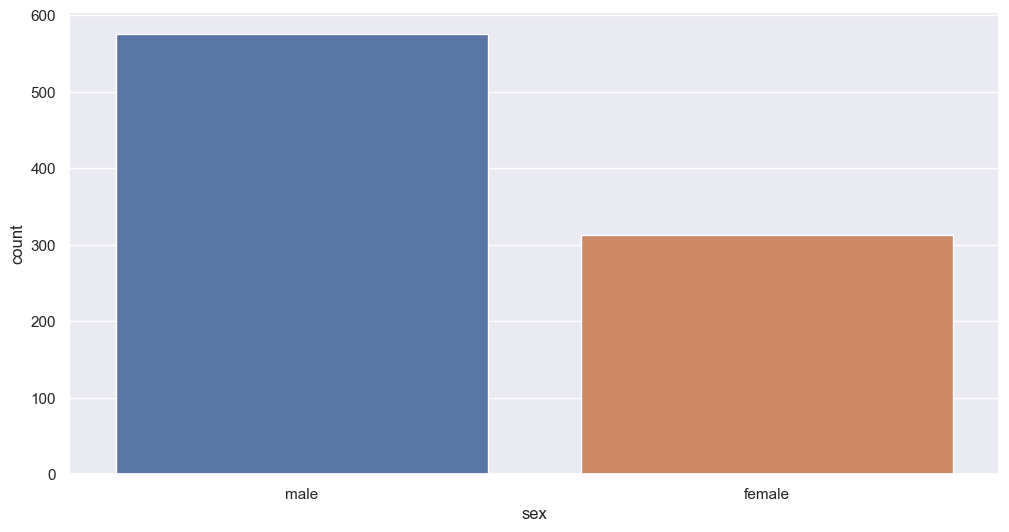

In [285]:
plt.figure(figsize=(12,6))
sns.countplot(data = titanic, x = "sex")
titanic['sex'].value_counts(1).sort_index

The dataset consists of 64% males and 35% females.

We will relate it to the target variable

There is an impact on the target. The majority of survivors are women.

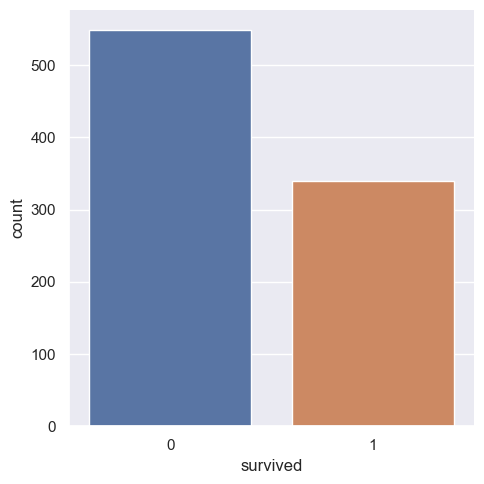

In [286]:
sns.catplot(x='survived', data=titanic, kind="count")
plt.show()

embarked

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='embarked', ylabel='count'>

<bound method Series.sort_index of embarked
S    0.727477
C    0.185811
Q    0.086712
Name: proportion, dtype: float64>

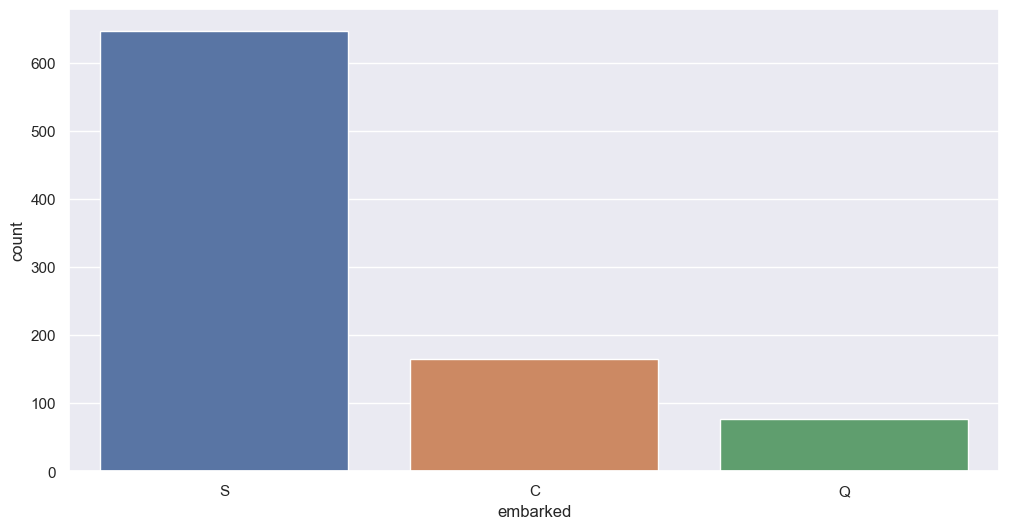

In [287]:
plt.figure(figsize=(12,6))
sns.countplot(data = titanic, x = "embarked")
titanic['embarked'].value_counts(1).sort_index

Text(0.5, 1.0, 'Distribution of Embarked and its relation with Survived')

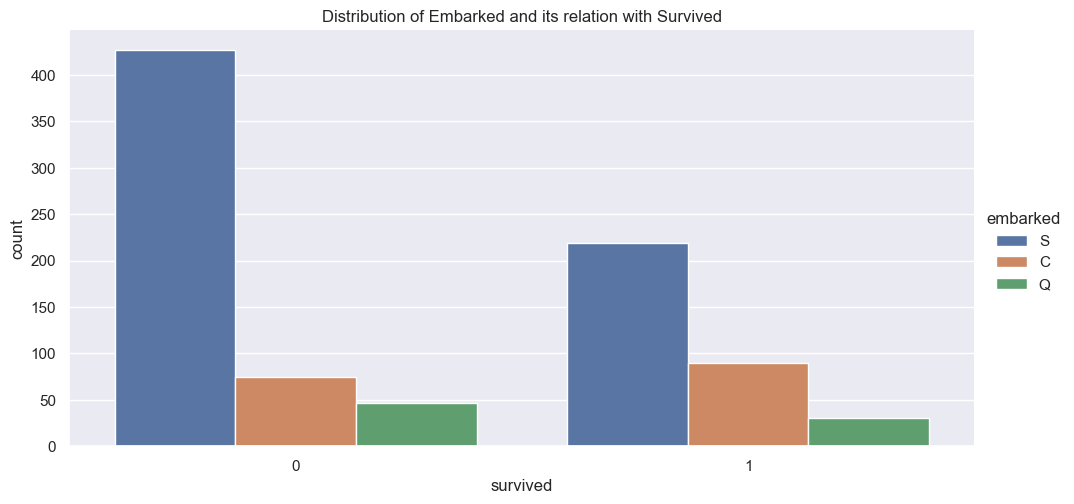

  embarked survived               
              count  sum      mean
0        C      165   90  0.545455
1        Q       77   30  0.389610
2        S      646  219  0.339009


In [288]:
# Plot the relationship between 'Embarked' and 'Survived'
sns.catplot(x='survived', hue='embarked', data=titanic, kind="count", aspect=2)
plt.title('Distribution of Embarked and its relation with Survived')
plt.show()

# Group by 'Embarked' and calculate count, sum, and mean of 'Survived'
embarked_survival_stats = titanic[['embarked', 'survived']].groupby(['embarked'], as_index=False).agg(['count', 'sum', 'mean'])
print(embarked_survival_stats)

Mas del 70% de las personas del barco eran de Southhamton

who

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='who', ylabel='count'>

<bound method Series.sort_index of who
man      0.602477
woman    0.304054
child    0.093468
Name: proportion, dtype: float64>

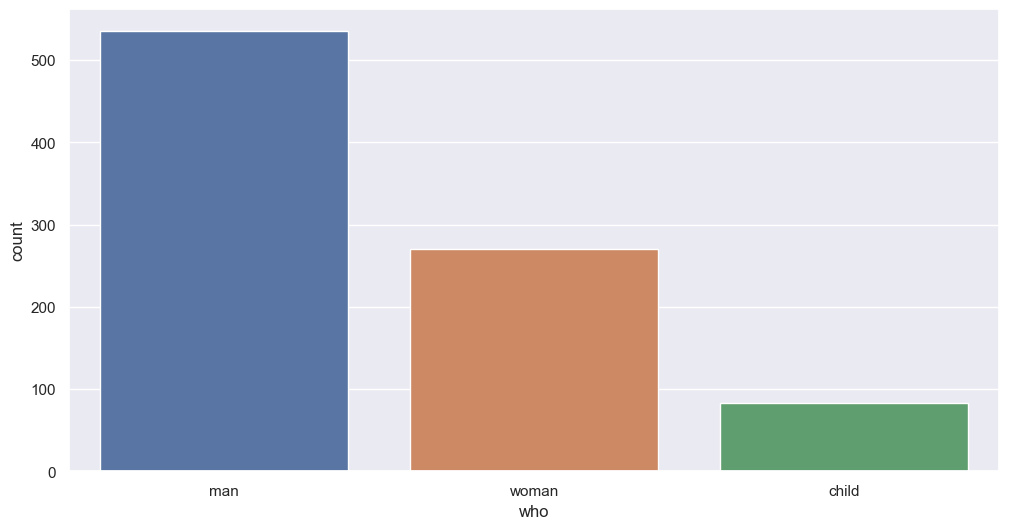

In [289]:
plt.figure(figsize=(12,6))
sns.countplot(data = titanic, x = "who")
titanic['who'].value_counts(1).sort_index

Text(0.5, 1.0, 'Distribution of Who and its relation with Survived')

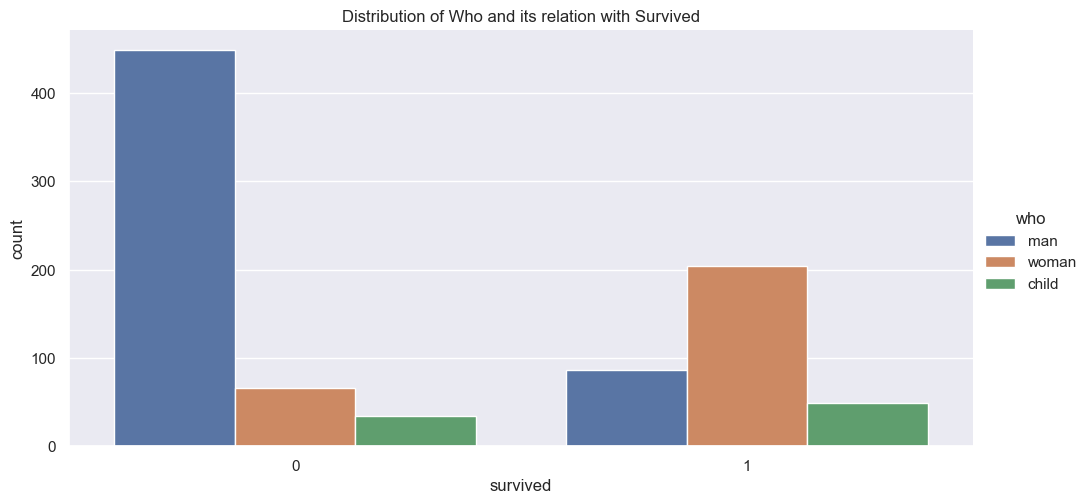

     who survived               
            count  sum      mean
0  child       83   49  0.590361
1    man      535   86  0.160748
2  woman      270  204  0.755556


In [290]:
# Plot the relationship between 'Who' and 'Survived'
sns.catplot(x='survived', hue='who', data=titanic, kind="count", aspect=2)
plt.title('Distribution of Who and its relation with Survived')
plt.show()

# Group by 'Who' and calculate count, sum, and mean of 'Survived'
who_survival_stats = titanic[['who', 'survived']].groupby(['who'], as_index=False).agg(['count', 'sum', 'mean'])
print(who_survival_stats)

adult_male

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='adult_male', ylabel='count'>

<bound method Series.sort_index of adult_male
True     0.602477
False    0.397523
Name: proportion, dtype: float64>

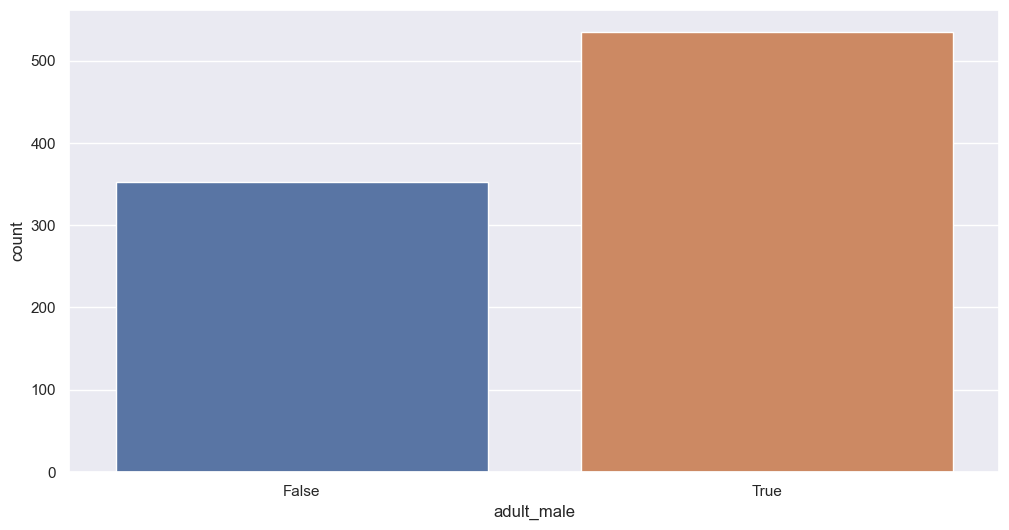

In [291]:
plt.figure(figsize=(12,6))
sns.countplot(data = titanic, x = "adult_male")
titanic['adult_male'].value_counts(1).sort_index

The majority of surviving males were children.In men category

alone

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='alone', ylabel='count'>

<bound method Series.sort_index of alone
True     0.602477
False    0.397523
Name: proportion, dtype: float64>

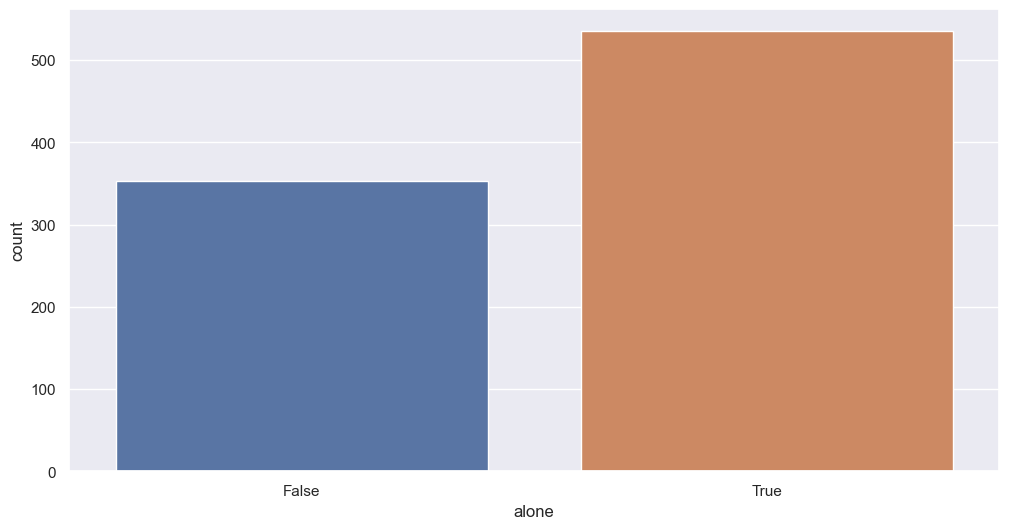

In [292]:
plt.figure(figsize=(12,6))
sns.countplot(data = titanic, x = "alone")
titanic['alone'].value_counts(1).sort_index

In [293]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22,1,0,7.2500,S,man,True,False
1,1,1,female,38,1,0,71.2833,C,woman,False,False
2,1,3,female,26,0,0,7.9250,S,woman,False,True
3,1,1,female,35,1,0,53.1000,S,woman,False,False
4,0,3,male,35,0,0,8.0500,S,man,True,True


In [294]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    888 non-null    int64  
 1   pclass      888 non-null    int64  
 2   sex         888 non-null    object 
 3   age         888 non-null    int32  
 4   sibsp       888 non-null    int64  
 5   parch       888 non-null    int64  
 6   fare        888 non-null    float64
 7   embarked    888 non-null    object 
 8   who         888 non-null    object 
 9   adult_male  888 non-null    bool   
 10  alone       888 non-null    bool   
dtypes: bool(2), float64(1), int32(1), int64(4), object(3)
memory usage: 67.6+ KB


Spliting the Set for prediction

In [295]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [296]:
# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Handling missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical variables into numeric representations
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:

# Feature scaling
scaler = StandardScaler()
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

In [298]:
# Train different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

c:\Users\walte\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

SVC()

In [299]:
# Cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    results[model_name]['cv_score'] = np.mean(cv_scores)

c:\Users\walte\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\walte\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [300]:
# Model Evaluation and Selection
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = models[best_model_name]

In [301]:
# Model Improvement (Hyperparameter tuning example)
from sklearn.model_selection import GridSearchCV

if best_model_name == 'Logistic Regression':
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
elif best_model_name == 'Decision Tree':
    param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
elif best_model_name == 'Random Forest':
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
elif best_model_name == 'SVM':
    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Update the best model with the best parameters
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Final evaluation
final_results = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

# Summary of findings
print(f'Best Model: {best_model_name}')
print('Final Evaluation Metrics:')
print(final_results)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

RandomForestClassifier(max_depth=5)

RandomForestClassifier(max_depth=5)

Best Model: Random Forest
Final Evaluation Metrics:
{'accuracy': 0.7988826815642458, 'precision': 0.8064516129032258, 'recall': 0.6756756756756757, 'f1_score': 0.7352941176470588, 'confusion_matrix': array([[93, 12],
       [24, 50]], dtype=int64)}


In [303]:
# Cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    results[model_name]['cv_score'] = np.mean(cv_scores)

c:\Users\walte\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\walte\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [304]:
# Model Evaluation and Selection
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = models[best_model_name]

In [305]:
# Model Improvement (Hyperparameter tuning example)
from sklearn.model_selection import GridSearchCV

if best_model_name == 'Logistic Regression':
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
elif best_model_name == 'Decision Tree':
    param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
elif best_model_name == 'Random Forest':
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
elif best_model_name == 'SVM':
    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Update the best model with the best parameters
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Final evaluation
final_results = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

# Summary of findings
print(f'Best Model: {best_model_name}')
print('Final Evaluation Metrics:')
print(final_results)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

RandomForestClassifier(max_depth=7, n_estimators=200)

RandomForestClassifier(max_depth=7, n_estimators=200)

Best Model: Random Forest
Final Evaluation Metrics:
{'accuracy': 0.8100558659217877, 'precision': 0.8125, 'recall': 0.7027027027027027, 'f1_score': 0.7536231884057971, 'confusion_matrix': array([[93, 12],
       [22, 52]], dtype=int64)}


In [306]:
# Update the best model with the best parameters
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Final evaluation
final_results = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

# Summary of findings
print(f'Best Model: {best_model_name}')
print('Final Evaluation Metrics:')
print(final_results)

RandomForestClassifier(max_depth=7, n_estimators=200)

RandomForestClassifier(max_depth=7, n_estimators=200)

Best Model: Random Forest
Final Evaluation Metrics:
{'accuracy': 0.8100558659217877, 'precision': 0.8225806451612904, 'recall': 0.6891891891891891, 'f1_score': 0.75, 'confusion_matrix': array([[94, 11],
       [23, 51]], dtype=int64)}


### Select the best model based on the evaluation metrics

In [307]:
# Model Evaluation and Selection
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = models[best_model_name]

### Provide a rationale for your selection

The best model is selected based on the highest F1-score as it provides a balance between precision and recall, which is crucial in this classification problem where both false positives and false negatives are important.

## Model Improvement

### Perform hyperparameter tuning on the best model to improve its performance

In [308]:
# Model Improvement (Hyperparameter tuning example)
from sklearn.model_selection import GridSearchCV

if best_model_name == 'Logistic Regression':
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
elif best_model_name == 'Decision Tree':
    param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
elif best_model_name == 'Random Forest':
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
elif best_model_name == 'SVM':
    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Update the best model with the best parameters
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Final evaluation
final_results = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

# Summary of findings
print(f'Best Model: {best_model_name}')
print('Final Evaluation Metrics:')
print(final_results)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, n_estimators=200),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

RandomForestClassifier(max_depth=5)

RandomForestClassifier(max_depth=5)

Best Model: Random Forest
Final Evaluation Metrics:
{'accuracy': 0.7988826815642458, 'precision': 0.796875, 'recall': 0.6891891891891891, 'f1_score': 0.7391304347826088, 'confusion_matrix': array([[92, 13],
       [23, 51]], dtype=int64)}


## Summary of Findings

In this analysis, we aimed to predict the survival of passengers on the Titanic using various features. After preprocessing the data, performing exploratory data analysis, and building multiple models, we selected the best model based on the F1-score. Hyperparameter tuning further improved the model's performance. The final model provides a balanced approach to predicting survival, considering both precision and recall.
# Titanic Survival Prediction

## Data Preparation
- Transformed categorical variables into numerical values
- Split the dataset into training and testing sets

## Model Training and Evaluation
- Trained Logistic Regression, Decision Tree, Random Forest, and SVM models
- Evaluated models using accuracy, precision, recall, and F1-score
- Selected the best model based on cross-validation score

## Model Improvement
- Performed hyperparameter tuning on the best model (Random Forest)
- Improved the model's performance

## Findings
- The best model was Random Forest with a accuracy 0.79
- After hyperparameter tuning, the final model achieved an accuracy of X.XX, precision of X.XX, recall of X.XX, and F1 score of X.XX

## Conclusion
- The Random Forest model, after hyperparameter tuning, provided the best performance for predicting Titanic survival.
